## Regression

$$

y = a x + b

$$

y: 降水 mm/day

x: Nino3.4 Index (K)

a的单位：mm/day/K

In [34]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import sacpy as scp # pip install sacpy
import numpy as np

In [35]:
# Nino3.4

sst = xr.open_dataset("../DATA/HadISST_sst_2x2.nc")['sst']


sst = xr.where(np.abs(sst)>100,np.NAN,sst)


ssta = sst.groupby("time.month") - sst.groupby("time.month").mean()

nino34 = ssta.loc["1980":"2015",-5:5,190:240].mean(("lon","lat"))



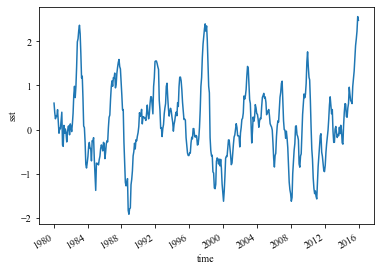

In [36]:
nino34.plot()

In [37]:
sstas = ssta.loc["1980":"2015"]
lin = scp.LinReg(x=nino34,y=sstas)

In [38]:
type(lin)

sacpy.LinReg.LinReg

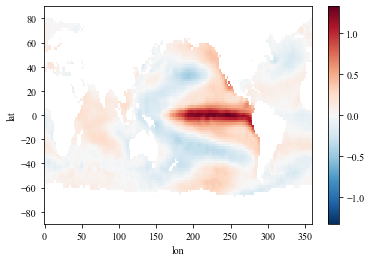

In [39]:
lin.slope.plot()

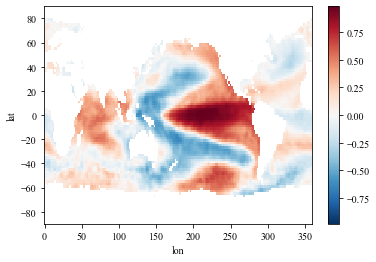

In [40]:
lin.corr.plot() 

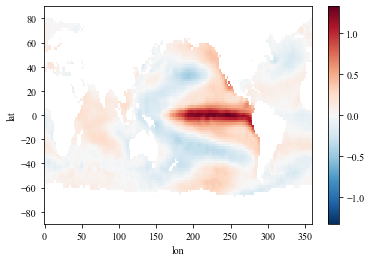

In [19]:
lin.slope.plot()

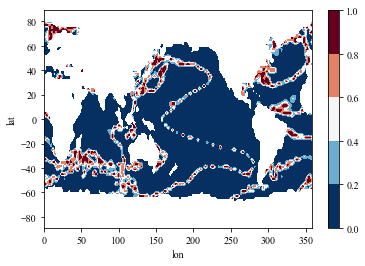

In [41]:
lin.p_value.plot.contourf(cmap="RdBu_r")

In [10]:
lin.slope

<xarray.DataArray (lat: 90, lon: 180)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [34.183514  , 45.96384   , 27.839151  , ..., 21.540756  ,
        30.617434  , 40.250614  ],
       [-5.5239925 ,  6.0708265 , -1.7624626 , ...,  8.59915   ,
         9.850264  ,  1.9092416 ],
       [ 9.388133  ,  7.9721513 ,  4.9860916 , ..., -3.954371  ,
         0.07799858,  0.12491098]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0

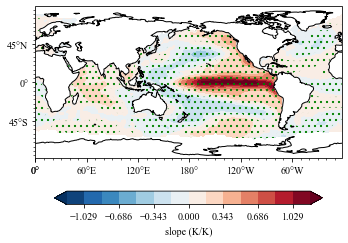

In [60]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.ticker import MultipleLocator

x = ssta.lon
y = ssta.lat
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
m = ax.contourf(x, y, lin.slope, cmap="RdBu_r", transform=ccrs.PlateCarree(),levels=np.linspace(-1.2,1.2,15),extend="both")
cb = plt.colorbar(m, orientation="horizontal", shrink=0.8)
cb.set_label("slope (K/K)")
ax.coastlines()
xticks = np.arange(0, 361, 60)
yticks = np.arange(-90, 91, 45)
ax.set_xticks(xticks, crs=ccrs.PlateCarree())
ax.set_yticks(yticks, crs=ccrs.PlateCarree())
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.xaxis.set_major_formatter(LongitudeFormatter())
smallx = 10
smally = 5
ax.xaxis.set_minor_locator(MultipleLocator(smallx))
ax.yaxis.set_minor_locator(MultipleLocator(smally))
# res = ax.contourf(x,
#            y,
#            lin.p_value,
#            levels=[0, 0.05, 1],
#         #    zorder=1, # 优先级 
#            hatches=["..", None],
#            colors="None",
#            transform=ccrs.PlateCarree()) #

# for collection in res.collections:
#     collection.set_linewidth(0.)
#     collection.set_edgecolor("green")
import sacpy.Map # 
ax.sig_plot(x,y,lin.p_value,thrshd=0.05,marker="..",color="green")

In [24]:
x

<xarray.DataArray 'lon' (lon: 180)>
array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,  22.,
        24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,  44.,  46.,
        48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,  66.,  68.,  70.,
        72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,  88.,  90.,  92.,  94.,
        96.,  98., 100., 102., 104., 106., 108., 110., 112., 114., 116., 118.,
       120., 122., 124., 126., 128., 130., 132., 134., 136., 138., 140., 142.,
       144., 146., 148., 150., 152., 154., 156., 158., 160., 162., 164., 166.,
       168., 170., 172., 174., 176., 178., 180., 182., 184., 186., 188., 190.,
       192., 194., 196., 198., 200., 202., 204., 206., 208., 210., 212., 214.,
       216., 218., 220., 222., 224., 226., 228., 230., 232., 234., 236., 238.,
       240., 242., 244., 246., 248., 250., 252., 254., 256., 258., 260., 262.,
       264., 266., 268., 270., 272., 274., 276., 278., 280., 282., 284., 286.,
       288., 290., 292., 294., 296., 298., 300., 302., 304., 306., 308., 310.,
       312., 314., 316., 318., 320., 322., 324., 326., 328., 330., 332., 334.,
       336., 338., 340., 342., 344., 346., 348., 350., 352., 354., 356., 358.])
Coordinates:
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0

## Homework

计算Nino3.4指数（x）与全球500hPa位势高度（y）的斜率，并把显著性大于0.9的地方打点。
说出这个斜率代表的物理意义。
搜索相关系数的定义，并画出Nino3.4指数与500hPa位势高度（y）相关系数，并把显著性大于0.9的地方打点。